## Extra Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr
from scipy import optimize  #Used to fit the regression
import matplotlib.pyplot as plt
import pandas as pd  #Used for general data manipulation
import os
import seaborn as sns

In [2]:
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data = data.drop(['year.1', 'year.1'], axis=1, inplace=False)
data = data.astype(float)

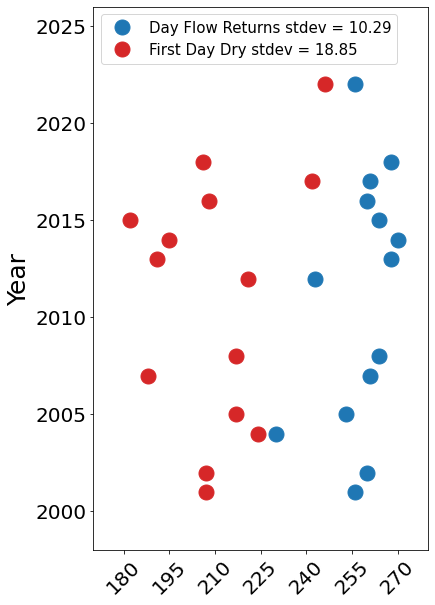

In [3]:
flow_return_std = (np.std(data['flow_returns_doy']))
first_dry_std = (data['no_flow_start_date_doy'].std())

fig = plt.figure(figsize=(6,10))
ax1=fig.add_subplot(1,1,1)
ax1.plot(data['flow_returns_doy'],data['year'], 'o', markersize = 15, color = 'tab:blue', label='Day Flow Returns stdev = '+str(round(flow_return_std,2)))
ax1.plot(data['no_flow_start_date_doy'], data['year'], 'o', markersize = 15, color = 'tab:red', label='First Day Dry stdev = '+str(round(first_dry_std,2)))
ax1.set_xlim([170, 280])
ax1.set_ylim([1998, 2026])

ax1.set_ylabel('Year', size=25)
#ax1.set_xlabel('Day of Year', size=25)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
ax1.tick_params(axis='x', labelrotation=45, labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.legend(fontsize = 15, loc='upper left')

fig.savefig('results/figures/Day Dry and Day Returns.png', dpi = 300, bbox_inches='tight')

In [4]:
data

,year,days_no_flow_observed,no_flow_start_date_doy,flow_returns_doy,peak_discharge_to_dry_duration_days,dry_binary,max_discharge_doy,SWE_max_WY,SWE_max_WY-1,peak_to_melt_duration,...,PET_OND_WY,PET_JFM_WY-1,PET_JAS_WY-1,PET_cum_WY-1,la_nina_WY,la_nina_WY-1,days_no_flow_observed_WY-1,temp_before_flow_returns,temp_after_flow_returns,precip_in_window
0,2001.0,59.0,207.0,256.0,127.0,1.0,80.0,20.6,28.8,31.0,...,14.476735,18.229206,58.868595,15746.2930,-0.400,-1.025,16.0,11.10,10.36,0.4
1,2002.0,39.0,207.0,260.0,103.0,1.0,104.0,27.8,20.6,53.0,...,16.717836,17.667940,59.654675,13123.1300,0.250,-0.400,59.0,14.58,8.58,0.3
2,2004.0,14.0,224.0,230.0,141.0,1.0,83.0,28.7,22.9,65.0,...,18.354887,15.883489,59.409607,13136.1180,0.375,0.450,16.0,18.72,13.78,0.7
3,2005.0,44.0,217.0,253.0,78.0,1.0,139.0,20.2,28.7,44.0,...,14.458436,16.097878,54.491550,12804.1630,0.375,0.375,14.0,12.90,4.36,0.0
4,2007.0,76.0,188.0,261.0,117.0,1.0,71.0,21.7,33.9,58.0,...,17.066435,13.527661,57.984640,12677.1530,-0.025,-0.300,0.0,11.82,8.22,0.4
5,2008.0,51.0,217.0,264.0,90.0,1.0,127.0,30.0,21.7,47.0,...,15.943196,19.375078,57.869480,13374.2790,-1.000,-0.025,76.0,12.52,6.66,0.7
6,2009.0,0.0,NaN,NaN,NaN,0.0,112.0,26.1,30.0,44.0,...,16.406816,13.214120,58.011383,12460.7660,-0.200,-1.000,51.0,NaN,NaN,NaN
7,2011.0,0.0,NaN,NaN,NaN,0.0,17.0,31.7,25.9,46.0,...,15.762539,14.688388,56.294796,11814.8670,-1.000,0.275,0.0,NaN,NaN,NaN
8,2012.0,21.0,221.0,243.0,129.0,1.0,92.0,22.1,31.7,39.0,...,16.003061,13.182602,56.616974,11647.9390,-0.425,-1.000,0.0,13.78,11.24,0.0
9,2013.0,77.0,191.0,268.0,94.0,1.0,97.0,14.4,22.1,41.0,...,16.231367,15.957176,58.276733,12881.9980,-0.250,-0.425,21.0,8.60,4.20,1.9


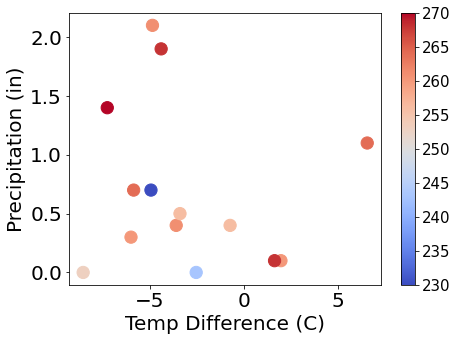

In [9]:
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data['temp_difference_before&after'] =  data['temp_after_flow_returns']-data['temp_before_flow_returns']
data = data.dropna(axis=0) #drop any row with NaN

sizes = np.array(data['flow_returns_doy'])-150
sizes = sizes**1.25


fig = plt.figure(figsize=(7,5), facecolor='white')
ax1 = fig.add_subplot(1,1,1)
im = ax1.scatter(data['temp_difference_before&after'], data['precip_in_window'], s=150, c=data['flow_returns_doy'], cmap ='coolwarm')
#ax1.set_xlim([-0, 20])
#ax1.set_ylim([1998, 2024.9])
ax1.set_ylabel('Precipitation (in)', size=20)
ax1.set_xlabel('Temp Difference (C)', size=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=15)
fig.savefig('results/figures/temp_and_rain with days dry color by flow returns.png', dpi = 300, bbox_inches='tight')

In [6]:
data['temp_difference_before&after']

0    -0.74
1    -6.00
2    -4.94
3    -8.54
4    -3.60
5    -5.86
8    -2.54
9    -4.40
10   -7.26
11    6.54
12    1.96
13   -4.86
14    1.62
17   -3.40
Name: temp_difference_before&after, dtype: float64

C:\Users\thoma\AppData\Local\Temp\ipykernel_9948\4146448223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data == 'NaN'] = np.nan #set nan values
C:\Users\thoma\AppData\Local\Temp\ipykernel_9948\4146448223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data == 'NaN'] = np.nan #set nan values
C:\Users\thoma\AppData\Local\Temp\ipykernel_9948\4146448223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

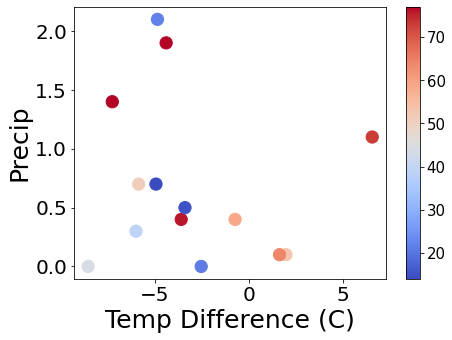

In [7]:
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data['temp_difference_before&after'] =  data['temp_after_flow_returns']-data['temp_before_flow_returns']
data = data.dropna(axis=0) #drop any row with NaN

sizes = np.array(data['flow_returns_doy'])-150
sizes = sizes**1.25


fig = plt.figure(figsize=(7,5), facecolor='white')
ax1 = fig.add_subplot(1,1,1)
im = ax1.scatter(data['temp_difference_before&after'], data['precip_in_window'], s=150, c=data['days_no_flow_observed'], cmap ='coolwarm')
#ax1.set_xlim([-0, 20])
#ax1.set_ylim([1998, 2024.9])
ax1.set_ylabel('Precip', size=25)
ax1.set_xlabel('Temp Difference (C)', size=25)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=15)
#fig.savefig('results/figures/temp_and_rain with days dry.png', dpi = 300, bbox_inches='tight')